# Анализ оттока клиентов

## Описание проекта

### Задача**:**

Проанализировать клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.

- Провести исследовательский анализ данных,
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.
    


## Материалы

- [Презентация](https://drive.google.com/file/d/1QrJwSvfKA9E8jrMFpvNAxeF7yEWYYiAJ/view?usp=sharing)  
- [Дашборд](https://public.tableau.com/views/Bank_16663927209710/Dashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)



## Получение и обработка данных

In [ ]:
# импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from scipy import stats as st


### Загрузка данных

In [ ]:
# загружаем данные
url = "https://raw.githubusercontent.com/XeniaMishina/final_project/main/bank_dataset.csv"

df = pd.read_csv(url)

### Проверка данных на пропуски

In [ ]:
# функция, дающая общую информацию о датасете
def first_impression(df):
    print()
    print('Первые 5 строк данных:')
    display(df.head())
    print('\n')
    print('Общая информация о данных:\n')
    print(df.info())
    print('\n')
    print(f'Количество полных строк-дубликатов = {df.duplicated().sum()},')
    print(f'что составляет {(df.duplicated().sum() / len(df)):.3%} датафрейма')

In [ ]:
first_impression(df)


Первые 5 строк данных:


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0




Общая информация о данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


Количество полных строк-дубликатов = 0,
что составляет 0.000% датафрейма


In [ ]:
# приведем столбцы в нижний регистр и разделим слова

df.columns = df.columns.str.lower()
df = df.rename(columns={'userid': 'user_id',
                        'creditcard': 'credit_card'})
df.head()


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Дубликатов нет, пропуски имеются лишь в одной колонке - `balance`, но заменять их смысла нет, потому что рационального способа находить примерный баланс на счету нет, он может никак не зависеть от других данных.

### Проверка данных на выбросы

In [ ]:
# проверяем числовые столбцы
features = ['score', 'age', 'balance', 'estimated_salary']

for feature in features:
  print(feature)
  print(df[feature].describe())
  print('-' * 70)
  print()

score
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64
----------------------------------------------------------------------

age
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64
----------------------------------------------------------------------

balance
count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64
----------------------------------------------------------------------

estimated_salary
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      10019

In [ ]:
# выделяем числовые и категориальные переменные
num_columns = ['score', 'age', 'balance', 'estimated_salary']
not_num_columns = ['gender', 'objects', 'products', 'credit_card', 'loyalty', 'city']


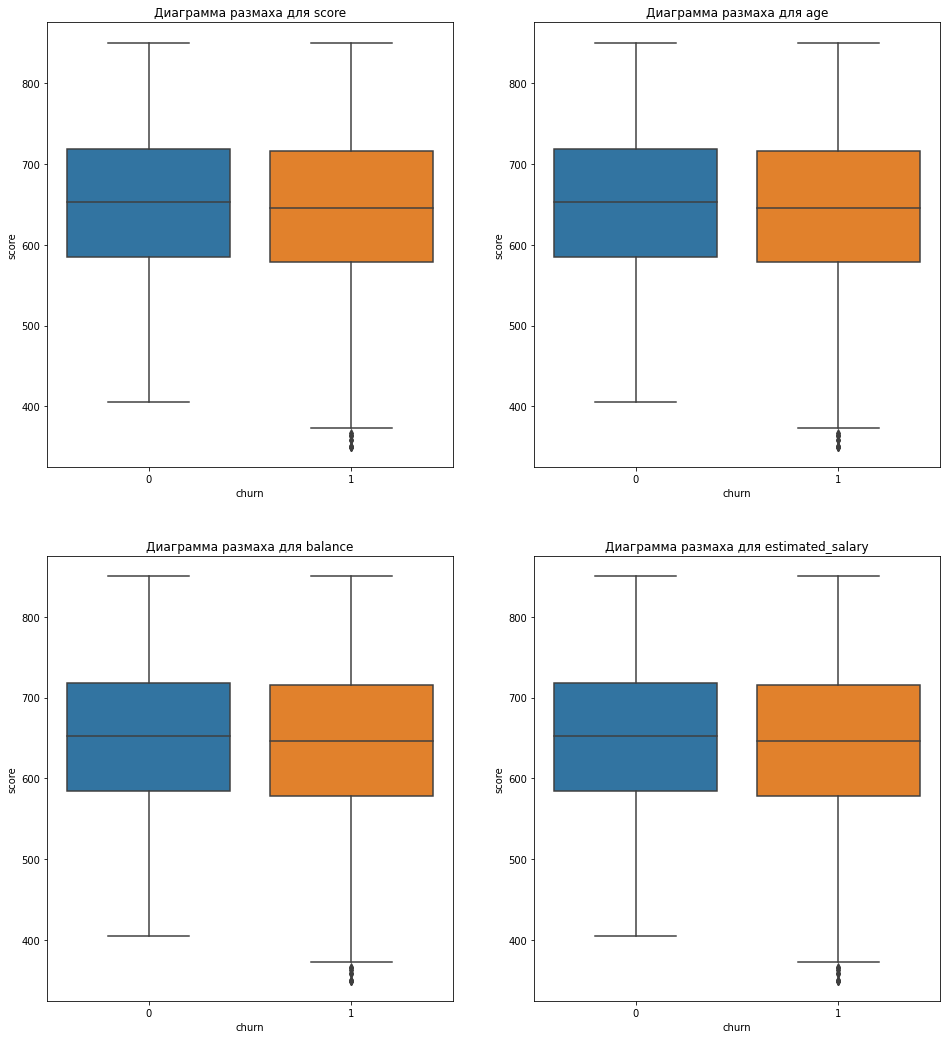

In [ ]:
# проверяем данные на выбросы
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,18))
axes_list = [item for sublist in axes for item in sublist]
for column in df.columns:
  if column in num_columns:
    ax = axes_list.pop(0)
    sns.boxplot(data=df, y="score", x="churn", ax=ax)
    #sns.boxplot(y=column, data=df, hue='churn', ax=ax)
    ax.set_title(f'Диаграмма размаха для {column}')

Данные довольно чистые, перекосов или выбросов в них не обнаружено.   
Значит, можно приступать к анализу.

## Исследовательский анализ данных

### Изучим средние значения и отклонения для ушедших и оставшихся



In [ ]:
# общий портрет клиентов
df.drop(columns=['user_id']).describe(percentiles=[.05, .25, .5, .75, .95])

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,489.000000,25.000000,1.000000,70367.943000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
95%,812.000000,60.000000,9.000000,169984.256000,2.000000,1.00000,1.000000,190155.375500,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Если человек является клиентом данного банка, то скорее всего
-  ему около 30-45 лет, 
- у него около 5 объектов недвижимости,
- баланс около 120.000,
- он пользуется хотя бы одним продуктом банка,
- у него есть кредитная карта даннного банка,
- средняя зарплата около 100.000

In [ ]:
# средние значеия для ушедших и оставшихся
df.drop(columns=['user_id']).groupby('churn').mean()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,119535.864270,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531


In [ ]:
# медианные значеия для ушедших и оставшихся
df.drop(columns=['user_id']).groupby('churn').median()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,653,36,5,119791.215,2,1,1,99645.04
1,646,45,5,119948.090,1,1,0,102460.84


Различия для оставшихся и ушедших на первый взгляд не кажутся слишком заметными, можно сказать, что
- средний возраст ушедших заметно больше среднего возраста оставшихся,
- лояльность ушедших заметно ниже, оно и понятно,
- все остальные показатели в среднем практически одинаковы и разница по ним не превышает нескольких процентов, 
- больше половины оставшихся пользуются двумя продуктами банка в противовес одному продукту для более половины ушедших, однако средние значения используемых продуктов отличаются несильно.

### Построим распределения признаков для ушедших и не ушедших в сравнении


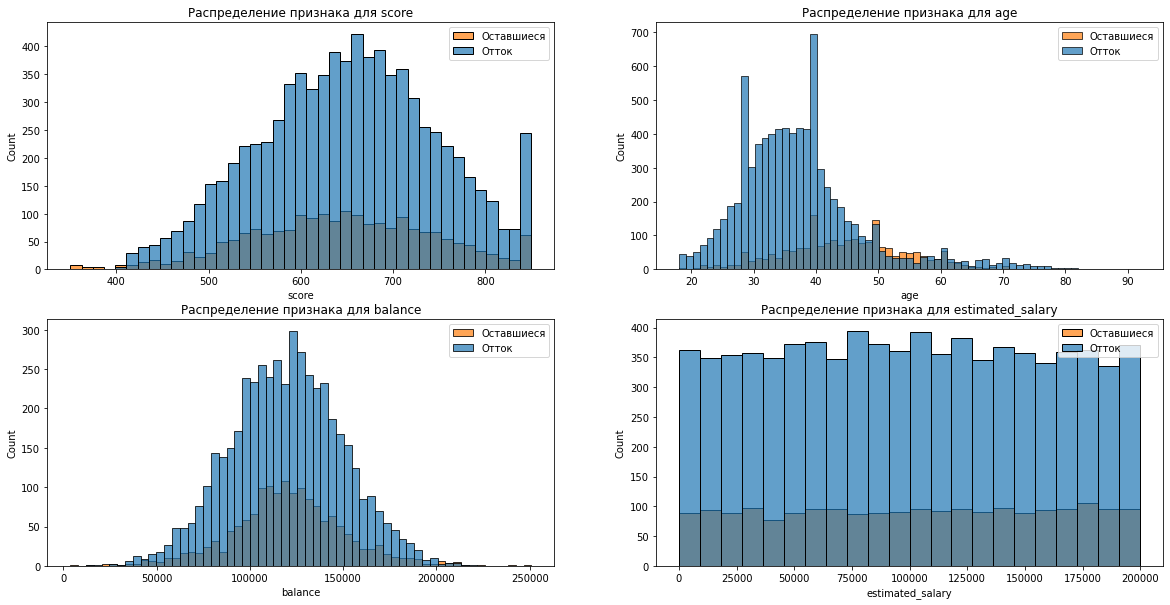

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]
for column in df.columns:
  if column in num_columns:
    ax = axes_list.pop(0)
    sns.histplot(x = df[column], hue='churn', data=df, ax=ax, alpha=0.7)
    ax.legend(['Оставшиеся', 'Отток'])
    ax.set_title(f'Распределение признака для {column}')




Распределения для всех признаков, кроме возраста, имеют похожую форму. Возраст ушедших заметно выше возраста оставшихся клиентов.

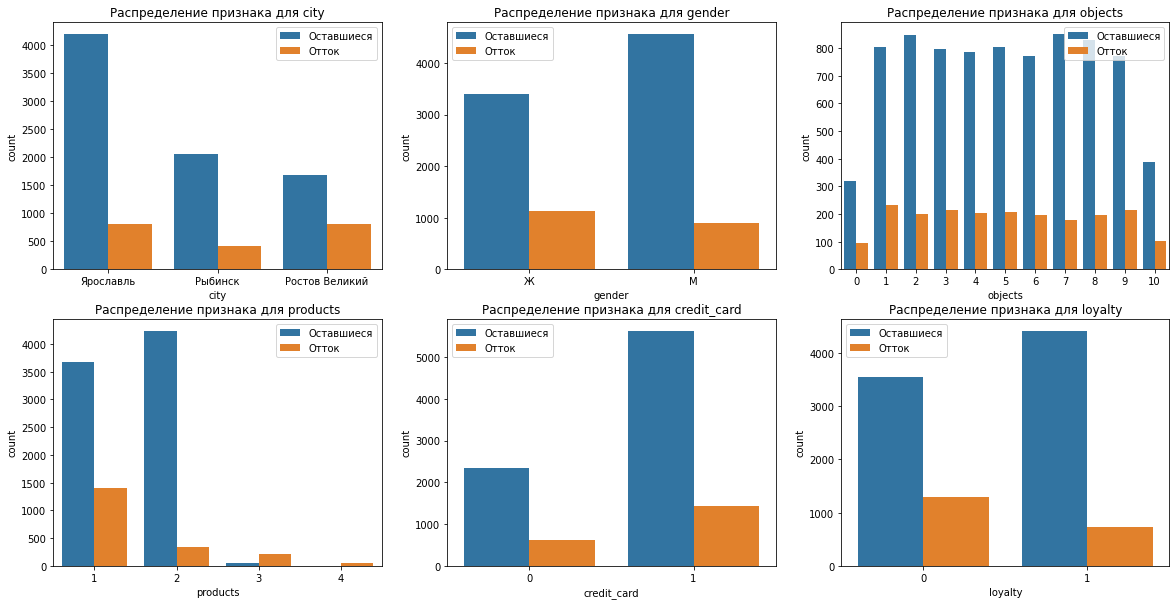

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes_list = [item for sublist in axes for item in sublist]
for column in df.columns:
  if column in not_num_columns:
    ax = axes_list.pop(0)
    sns.countplot(x = column, hue='churn', data=df, ax=ax)
    ax.legend(['Оставшиеся', 'Отток'])
    ax.set_title(f'Распределение признака для {column}')

Распределения для недвижимости, кредитных карт выглядят идентично и для ушедших, и для оставшихся.   

Лояльность среди ушедших ниже, чем среди оставшихся - перед уходом большая часть людей не пользовались банком - это понятно. 

Заметно, что среди оставшихся практически все пользуются 1 или 2 продуктами банка, а среди ушедших большая часть пользовалась 1 продуктом, но немаленькая доля людей пользовалась и 3, и 4 продуктами.

Хотя в среднем большая часть клиентов - мужчины, большая часть ушедших - женщины. Надо этим стоит задуматься...

Наибольший отток среди городов наблюдается в Ростове Великом, около трети клиентов оттуда ушли. Здесь меньше всего оставшихся и при этом больше всего ушедших. Возможно, в Ростове что-то идет не так.


In [ ]:
# доля женщин в среднем 
print(df['gender'].value_counts())
genders = df['gender'].value_counts().tolist()
print(f'Доля женщин в среднем: {genders[1] / sum(genders): .2%}')

М    5457
Ж    4543
Name: gender, dtype: int64
Доля женщин в среднем:  45.43%


In [ ]:
# доля женщин среди оставшихся
print(df.query('churn == 0')['gender'].value_counts())
genders_churn_0 = df.query('churn == 0')['gender'].value_counts().tolist()
print(f'Доля женщин среди оставшихся: {genders_churn_0[1] / sum(genders_churn_0): .2%}')

М    4559
Ж    3404
Name: gender, dtype: int64
Доля женщин среди оставшихся:  42.75%


In [ ]:
# доля женщин среди ушедших
print(df.query('churn == 1')['gender'].value_counts())
genders_churn_1 = df.query('churn == 1')['gender'].value_counts().tolist()
print(f'Доля женщин среди ушедших: {genders_churn_1[0] / sum(genders_churn_1): .2%}')

Ж    1139
М     898
Name: gender, dtype: int64
Доля женщин среди ушедших:  55.92%


Хотя среди всех клиентов банка доля женщин - 0.45, среди ушедших - 0.56,   
стоит обратить на это внимание.

In [ ]:
for column in not_num_columns:
    print(f'Параметр:    {column}')
    for value in df[column].unique().tolist():
        print(f'Для значения = {value}, отток ={df[df[column] == value]["churn"].mean(): .2}')
    print()

Параметр:    gender
Для значения = Ж, отток = 0.25
Для значения = М, отток = 0.16

Параметр:    objects
Для значения = 2, отток = 0.19
Для значения = 1, отток = 0.22
Для значения = 8, отток = 0.19
Для значения = 7, отток = 0.17
Для значения = 4, отток = 0.21
Для значения = 6, отток = 0.2
Для значения = 3, отток = 0.21
Для значения = 10, отток = 0.21
Для значения = 5, отток = 0.21
Для значения = 9, отток = 0.22
Для значения = 0, отток = 0.23

Параметр:    products
Для значения = 1, отток = 0.28
Для значения = 3, отток = 0.83
Для значения = 2, отток = 0.076
Для значения = 4, отток = 1.0

Параметр:    credit_card
Для значения = 1, отток = 0.2
Для значения = 0, отток = 0.21

Параметр:    loyalty
Для значения = 1, отток = 0.14
Для значения = 0, отток = 0.27

Параметр:    city
Для значения = Ярославль, отток = 0.16
Для значения = Рыбинск, отток = 0.17
Для значения = Ростов Великий, отток = 0.32



Наиболее склонны к оттоку:
- при сравнении полов: женщины
- при сравнении количества недвижимости: нет явных различий
- при сравнении количества используемых продуктов: пользующиеся 3 и 4 продуктами, с оттоками 83% и 100%
- при сравнении наличия кредитной карты: нет явных различий
- при сравнения лояльности: менее лояльные клиенты
- при сравнении города: в Ростове Великом отток в 2 раза больше, чем в других городах

### Построим матрицу корреляций


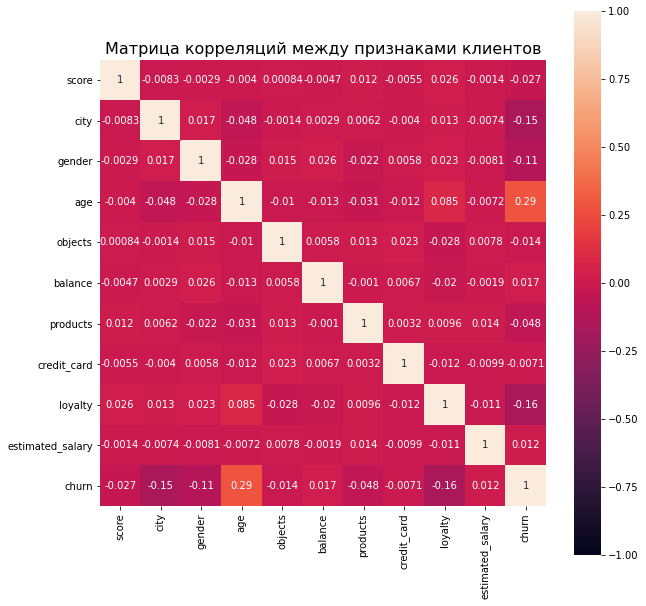

In [ ]:
# строим матрицу корреляций
cm = df_with_city_gender.drop(columns=['user_id']).corr()
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(cm, annot=True, square=True, vmin=-1, vmax=1) 
plt.title('Матрица корреляций между признаками клиентов', 
          fontdict={'fontsize': 16})
plt.show()

Можно видеть, что есть прямая корреляция между возрастом и оттоком, а так же небольшая корреляция оттока с городом, полом и лояльностью.


### Сформируем портрет ушедшего клиента

Если человек перестал быть клиентом данного банка, то скорее всего

- ему около 40-50 лет,
- у него около 5 объектов недвижимости,
- баланс около 120.000,
- он пользуется 1, 3 или 4 продуктами банка,
- у него есть кредитная карта даннного банка,
- средняя зарплата около 100.000,
- последнее время не был активным пользователем банка,
- с большей вероятностью это женщина
- он из Ростова Великого





## Проверка гипотез 

### Гипотеза о различии дохода между теми клиентами, которые ушли и теми, которые остались



**H0**: Средний доход ушедших и оставшихся не отличается.   

**H1**: Средний доход ушедших и оставшихся отличается

In [ ]:
sample1 = df.query('churn == 0')['estimated_salary']
sample2 = df.query('churn == 1')['estimated_salary']
results = st.ttest_ind(sample1, sample2, equal_var=False)

alpha = .01

print(f'p-значение: {results.pvalue: .3}')

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не можем отвергнуть нулевую гипотезу')



p-значение:  0.229
Не можем отвергнуть нулевую гипотезу


Разница между доходами ушедших и оставшихся не является статистически значимой. 

### Гипотеза о различии баланса на счете между теми клиентами, которые ушли и теми, которые остались



**H0**: Средний баланс на счету ушедших и оставшихся не отличается.   

**H1**: Средний баланс на счету ушедших и оставшихся отличается

In [ ]:
sample1 = df.query('churn == 0')['balance'].dropna()
sample2 = df.query('churn == 1')['balance'].dropna()
results = st.ttest_ind(sample1, sample2, equal_var=False)

alpha = .01

print(f'p-значение: {results.pvalue: .3}')

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не можем отвергнуть нулевую гипотезу')


p-значение:  0.174
Не можем отвергнуть нулевую гипотезу


Разница между балансом ушедших и оставшихся не является статистически значимой. 

### Гипотеза о различии баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались

**H0**: Средний балл кредитного скоринга ушедших и оставшихся не отличается.   

**H1**: Средний балл кредитного скоринга ушедших и оставшихся отличается

In [ ]:
sample1 = df.query('churn == 0')['score']
sample2 = df.query('churn == 1')['score']
results = st.ttest_ind(sample1, sample2, equal_var=False)

alpha = .01

print(f'p-значение: {results.pvalue: .1}')

if results.pvalue < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не можем отвергнуть нулевую гипотезу')

p-значение:  0.008
Отвергаем нулевую гипотезу


Разница между баллами кредитного скоринга ушедших и оставшихся является статистически значимой. Можно предположить, что средние значения действительно отличаются.

In [ ]:
df.groupby('churn', as_index=False)['score'].mean()

,churn,score
0,0,651.853196
1,1,645.351497


У оставшихся баллы кредитного скоринга в среднем больше.

Почему было решено использовать именно критерий Стьюдента, а не критерий Манна-Уитни?


1. У нас ожидается примерно одинаковая дисперсия и распределение близкое к нормальному, поэтому критерий Стьюдента применим, и он просто хорошо работает для сравнения средних.

2. Критерий Манна-Уитни плохо работает, если в выборке есть повторяющиеся значения. Баллы кредитного скоринга вполне могут совпадать не раз, поэтому этот критерий будет плохо работать.

In [ ]:
# Количество повторений баллов кредитного скоринга
df['score'].value_counts().sort_values(ascending=False)

850    233
678     63
655     54
667     53
705     53
      ... 
440      1
424      1
367      1
358      1
423      1
Name: score, Length: 460, dtype: int64

## Выводы


Был проведен исследовательский анализ данных, в ходе которого удалось выявить разницу между ушедшими и оставшимися клиентами, а так же сформулировать портрет ушедшего клиента:

- **разница между ушедшими и оставшимися:**
  - лояльность: ушедшие были нелояльными чаще, чем оставшиеся
  - количестве используемых продуктов банка: большая часть ушедших пользовалась всего 1 продуктом, хотя среди оставшихся больше половины используют по крайней мере 2 продукта
  - возраст: средний и медианный возрасты ушедших и оставшихся клиентов сильно отличаются - около 36 для оставшихся и около 45 для ушедших


- **портрет ушедшего клиента:** 
  - с большей вероятностью это женщина
  - возраст около 40-50 лет,
  - у него около 5 объектов недвижимости,
  - баланс около 120.000,
  - он пользуется 1, 3 или 4 продуктами банка,
  - у него есть кредитная карта данного банка,
  - средняя зарплата около 100.000,
  - последнее время не был активным пользователем банка
  - из Ростова Великого


**Было замечено следующее:** при том, что среди всех клиентов около **45%** женщин, среди ушедших этот показатель заметно выше - около **56%**.

**Наиболее склонны к оттоку:**
- при сравнении полов: женщины
- при сравнении количества недвижимости: нет явных различий
- при сравнении количсевта используемых продуктов: пользующиеся 3 и 4 продуктами, с оттоками 83% и 100%
- при сравнении наличия кредитной карты: нет явных различий
- при сравнения лояльности: менее лояльыне клиенты
- при сравнении города: в Ростове Великом отток в 2 раза больше, чем в других городах

Так же было протестировано 3 гипотезы:
- *о различии средних доходов*: различия не выявлено
- *о различии среднего баланса*: различия не выявлено
- *о различии среднего балла кредитного скоринга*: различие было признано статистически важным, среди ушедших балл кредитного скоринга меньше

Можно сделать вывод, что скорее всего средние доходы и балансы оставшихся и ушедших не различаются, а средние баллы кредитного скоринга выше у оставшихся. 

Есть небольшая корреляция оттока с возрастом, средний возраст ушедших выше, а так же с лояльностью и городом.

Среди ушедших много женщин. 

Город, с наибольшим отттоком - ростов Великий.

**Рекомендации по снижению оттока:**

Возможно, отток женщин связан с тем, что в этом банке есть специальные предложения для мужчин, а для женщин нет, либо в этом банке нет вообще специальных предложений для представителей любого пола, а в других банках они есть. В любом случае, стоит задуматься, почему уходит такой процент женщин.

Средний возраст уходящих около 45 лет, он сильно выше среднего возраста клиента оставшегося, возможно, в таком возрасте люди уже сильнее задумываются о пенсии, так что возможно такой средний возраст ушедших связан с невыгодными условиями накопления или чего-то подобного. 

В Ростове Великом очень большой отток, вероятно, что-то не так с местными филиалами. Нужно проверить именно их и найти различия с отделениями в дргуих городах.

Я бы обратила внимание именно на женщин, людей за 40 лет и жителей Ростова Великого, стоит выяснить, почему уходят именно они.